<a href="https://colab.research.google.com/github/Munshid-mhd/AI-TASK-MANAGMENT-SYSTEM/blob/main/AI_Task_Managment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import files
uploaded=files.upload()

Saving synthetic_task_dataset.csv.csv to synthetic_task_dataset.csv.csv


In [4]:
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

In [5]:
print(df.head())

   task_id                task_name  \
0        1    Memory class recently   
1        2    Election unit feeling   
2        3            Live security   
3        4               Mrs finish   
4        5  More fight character we   

                                         description priority       status  \
0  Condition pass science unit admit lawyer share...      Low    Completed   
1  Few plan goal myself response into information...     High    Completed   
2  Establish begin candidate always resource play...     High      Pending   
3  Capital late production perform today sometime...      Low  In Progress   
4  Avoid herself occur single general huge answer...   Medium    Completed   

  assigned_user    deadline  
0           Joe  2025-11-11  
1    Alexandria  2025-10-28  
2        Krista  2025-11-02  
3        Angela  2025-11-10  
4      Jennifer  2025-11-07  


eda


In [6]:
print("\n--- data types ")
print(df.info())


--- data types 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   task_id        100 non-null    int64 
 1   task_name      100 non-null    object
 2   description    100 non-null    object
 3   priority       100 non-null    object
 4   status         100 non-null    object
 5   assigned_user  100 non-null    object
 6   deadline       100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


In [7]:
print("\n-- missing values")
print(df.isnull().sum())


-- missing values
task_id          0
task_name        0
description      0
priority         0
status           0
assigned_user    0
deadline         0
dtype: int64


In [8]:
print(f"\n---repeated raws count {df.duplicated().sum()}--")


---repeated raws count 0--


In [9]:
categorical_cols=['priority','status','assigned_user']
for col in categorical_cols:
  print(f"\n---'{col}'unique values and occurences in the column ---")
  print("Unique Values:",df[col].unique())
  print("freequent count")
  print(df[col].value_counts())


---'priority'unique values and occurences in the column ---
Unique Values: ['Low' 'High' 'Medium']
freequent count
priority
Medium    36
Low       32
High      32
Name: count, dtype: int64

---'status'unique values and occurences in the column ---
Unique Values: ['Completed' 'Pending' 'In Progress']
freequent count
status
In Progress    41
Pending        32
Completed      27
Name: count, dtype: int64

---'assigned_user'unique values and occurences in the column ---
Unique Values: ['Joe' 'Alexandria' 'Krista' 'Angela' 'Jennifer' 'James' 'Mary' 'Stacie'
 'Alicia' 'John' 'Glenn' 'Joanna' 'Terri' 'Brian' 'Ashley' 'Michael'
 'Timothy' 'Eric' 'Cynthia' 'Katherine' 'Alexa' 'Scott' 'Stephen' 'Lisa'
 'Kathy' 'Adrienne' 'Aaron' 'Robert' 'Mark' 'Harold' 'Bethany' 'Kimberly'
 'Marissa' 'Jessica' 'Grant' 'Alec' 'Tracy' 'Joseph' 'Kristen' 'Trevor'
 'Heather' 'Jacqueline' 'Jason' 'Carolyn' 'Ethan' 'Eduardo' 'Tyrone'
 'Jill' 'Matthew' 'Troy' 'Chris' 'Allen' 'Amanda' 'Philip' 'Thomas'
 'Nancy' 'Edward

Data Cleaning


In [10]:
if'unnamed:0' in df.columns:
  df.drop('unnamed:0', axis=1, inplace=True)
  print("\n 'unnamed:0' removed unnecessary column")

In [11]:
df['assigned_user'].fillna('unnassinged',inplace=True)
print("\n Missing values in 'assigned_user' were filled in with 'unnassigned'")


 Missing values in 'assigned_user' were filled in with 'unnassigned'


/tmp/ipython-input-3507055451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['assigned_user'].fillna('unnassinged',inplace=True)


In [12]:
# --- Corrected Date Processing Code ---

# Use the EXACT column name: 'deadline'
date_col = 'deadline'

if date_col in df.columns:
    # 1. Convert the column to datetime objects (fixing the KeyError)
    # The 'errors='coerce'' handles any non-date values by turning them into NaT
    df['deadline'] = pd.to_datetime(df[date_col], errors='coerce')

    # 2. Extract useful features (Feature Engineering)
    # Check if the conversion was successful (i.e., not all NaT) before proceeding
    if df['deadline'].isnull().all() == False:
        df['due_day_of_week'] = df['deadline'].dt.day_name()
        df['is_due_weekend'] = df['deadline'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)
        print(f"\n✅ '{date_col}' column processed and new features added.")
    else:
        print(f"\n⚠ Warning: The '{date_col}' column contains no valid dates and could not be processed.")
else:
    print(f"\n❌ Critical Error: Column '{date_col}' not found. Please re-check column names.")


✅ 'deadline' column processed and new features added.


In [13]:
print(df.columns)

Index(['task_id', 'task_name', 'description', 'priority', 'status',
       'assigned_user', 'deadline', 'due_day_of_week', 'is_due_weekend'],
      dtype='object')


Nlp preprocessing on description

In [14]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Performs text preprocessing: lowercasing, punctuation/number removal,
    stop word removal, and lemmatization.
    """
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers, keeping only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization and Stop Word Removal
    # Split the text into words
    words = text.split()

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # 4. Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # 5. Join the words back into a single string
    return ' '.join(words)

# --- Apply the cleaning function to the 'task_name' and 'description' columns ---

# Create new columns to store the cleaned text
df['cleaned_task_name'] = df['task_name'].apply(clean_text)
df['cleaned_description'] = df['description'].apply(clean_text)

print("✅ Text preprocessing complete for 'task_name' and 'description'.")
print("\n--- Example of Cleaned Data (First Row) ---")
print(f"Original Task Name: {df['task_name'].iloc[0]}")
print(f"Cleaned Task Name: {df['cleaned_task_name'].iloc[0]}")
print(f"Original Description: {df['description'].iloc[0]}")
print(f"Cleaned Description: {df['cleaned_description'].iloc[0]}")

✅ Text preprocessing complete for 'task_name' and 'description'.

--- Example of Cleaned Data (First Row) ---
Original Task Name: Memory class recently
Cleaned Task Name: memory class recently
Original Description: Condition pass science unit admit lawyer share prepare of fill organization foot.
Cleaned Description: condition pas science unit admit lawyer share prepare fill organization foot


# Task
Perform feature extraction on the `cleaned_task_name` and `cleaned_description` columns of the dataframe using a suitable method (TF-IDF or word embeddings) and provide the code.

## Choose a feature extraction method

### Subtask:
Decide whether to use TF-IDF or a word embedding technique (like Word2Vec or BERT).


## Implement the chosen method

### Subtask:
Implement the chosen feature extraction method (TF-IDF) on the `cleaned_task_name` and `cleaned_description` columns.


**Reasoning**:
Implement the chosen feature extraction method (TF-IDF) on the `cleaned_task_name` and `cleaned_description` columns by importing `TfidfVectorizer` and applying it to both columns.



In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
# Using a new instance for each column to have separate vocabularies
tfidf_task_name = TfidfVectorizer()
tfidf_description = TfidfVectorizer()

# Apply TF-IDF to the 'cleaned_task_name' column
tfidf_matrix_task_name = tfidf_task_name.fit_transform(df['cleaned_task_name'])

# Apply TF-IDF to the 'cleaned_description' column
tfidf_matrix_description = tfidf_description.fit_transform(df['cleaned_description'])

print("✅ TF-IDF feature extraction complete for 'cleaned_task_name' and 'cleaned_description'.")
print(f"TF-IDF matrix shape for task name: {tfidf_matrix_task_name.shape}")
print(f"TF-IDF matrix shape for description: {tfidf_matrix_description.shape}")

✅ TF-IDF feature extraction complete for 'cleaned_task_name' and 'cleaned_description'.
TF-IDF matrix shape for task name: (100, 198)
TF-IDF matrix shape for description: (100, 557)


## Examine the output

### Subtask:
Examine the resulting TF-IDF matrices to understand their structure and how they represent the text data.


**Reasoning**:
Display the shape of the TF-IDF matrices and a small portion of them to understand their structure.



In [16]:
print("\n--- TF-IDF Matrix Shapes ---")
print(f"TF-IDF matrix shape for task name: {tfidf_matrix_task_name.shape}")
print(f"TF-IDF matrix shape for description: {tfidf_matrix_description.shape}")

print("\n--- Sample of TF-IDF Matrix (Task Name) ---")
# Convert a small slice to dense array for viewing
print(tfidf_matrix_task_name[:5, :10].toarray())

print("\n--- Sample of TF-IDF Matrix (Description) ---")
# Convert a small slice to dense array for viewing
print(tfidf_matrix_description[:5, :10].toarray())


--- TF-IDF Matrix Shapes ---
TF-IDF matrix shape for task name: (100, 198)
TF-IDF matrix shape for description: (100, 557)

--- Sample of TF-IDF Matrix (Task Name) ---
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

--- Sample of TF-IDF Matrix (Description) ---
[[0.         0.         0.         0.         0.         0.
  0.         0.30975587 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


**Reasoning**:
Get and print the feature names (words) from the TF-IDF vectorizers for both task names and descriptions to understand the vocabulary used.



In [17]:
# Get feature names (words) for task names
feature_names_task_name = tfidf_task_name.get_feature_names_out()
print("\n--- Sample Feature Names (Task Name) ---")
print(feature_names_task_name[:10]) # Print first 10 feature names

# Get feature names (words) for descriptions
feature_names_description = tfidf_description.get_feature_names_out()
print("\n--- Sample Feature Names (Description) ---")
print(feature_names_description[:10]) # Print first 10 feature names


--- Sample Feature Names (Task Name) ---
['able' 'account' 'act' 'adult' 'age' 'air' 'along' 'american' 'animal'
 'another']

--- Sample Feature Names (Description) ---
['able' 'account' 'across' 'actually' 'add' 'address' 'administration'
 'admit' 'adult' 'affect']


**Reasoning**:
Briefly interpret the structure and values in the TF-IDF matrices based on the shapes and sample data printed earlier.



In [18]:
print("\n--- Interpretation of TF-IDF Matrices ---")
print(f"The TF-IDF matrix for task names has a shape of {tfidf_matrix_task_name.shape}, meaning there are {tfidf_matrix_task_name.shape[0]} task entries and {tfidf_matrix_task_name.shape[1]} unique words (features) across all task names after preprocessing.")
print(f"The TF-IDF matrix for descriptions has a shape of {tfidf_matrix_description.shape}, indicating {tfidf_matrix_description.shape[0]} description entries and {tfidf_matrix_description.shape[1]} unique words (features) across all descriptions after preprocessing.")
print("\nBoth matrices are sparse, as seen from the sample outputs which contain many zeros. This is expected in TF-IDF matrices, where most documents only contain a small subset of the total vocabulary.")
print("The non-zero values in the matrices represent the TF-IDF score for a specific word in a specific document. A higher TF-IDF score indicates that the word is more important and relevant to that document compared to other documents in the corpus.")
print("For example, in the sample description matrix, the value 0.30975587 at the first row and eighth column means the word corresponding to the eighth feature name in the description vocabulary has this TF-IDF score in the first description.")
print("The feature names printed earlier ('able', 'account', etc.) are the words that form the columns of these matrices, representing the vocabulary learned by the TF-IDF vectorizers.")


--- Interpretation of TF-IDF Matrices ---
The TF-IDF matrix for task names has a shape of (100, 198), meaning there are 100 task entries and 198 unique words (features) across all task names after preprocessing.
The TF-IDF matrix for descriptions has a shape of (100, 557), indicating 100 description entries and 557 unique words (features) across all descriptions after preprocessing.

Both matrices are sparse, as seen from the sample outputs which contain many zeros. This is expected in TF-IDF matrices, where most documents only contain a small subset of the total vocabulary.
The non-zero values in the matrices represent the TF-IDF score for a specific word in a specific document. A higher TF-IDF score indicates that the word is more important and relevant to that document compared to other documents in the corpus.
For example, in the sample description matrix, the value 0.30975587 at the first row and eighth column means the word corresponding to the eighth feature name in the descrip

## Integrate with the dataframe (optional)

### Subtask:
Integrate the extracted TF-IDF features back into the main DataFrame if needed for further analysis or modeling.


**Reasoning**:
Convert the sparse TF-IDF matrices to dense arrays, create DataFrames from them, and concatenate them with the original DataFrame.



In [19]:
# 1. Convert sparse TF-IDF matrices to dense arrays
tfidf_task_name_dense = tfidf_matrix_task_name.toarray()
tfidf_description_dense = tfidf_matrix_description.toarray()

# Get feature names to use as column names
feature_names_task_name = tfidf_task_name.get_feature_names_out()
feature_names_description = tfidf_description.get_feature_names_out()

# 2. Create new DataFrames from these dense arrays
# Prefix column names to avoid collisions
df_tfidf_task_name = pd.DataFrame(tfidf_task_name_dense, columns=[f'task_name_tfidf_{col}' for col in feature_names_task_name])
df_tfidf_description = pd.DataFrame(tfidf_description_dense, columns=[f'description_tfidf_{col}' for col in feature_names_description])

# 3. Concatenate the new DataFrames with the original DataFrame df
# Ensure the indices align for correct concatenation
df = pd.concat([df, df_tfidf_task_name, df_tfidf_description], axis=1)

# 4. Print the first few rows of the updated DataFrame to verify the integration
print("\n--- Updated DataFrame with TF-IDF Features ---")
display(df.head())


--- Updated DataFrame with TF-IDF Features ---


,task_id,task_name,description,priority,status,assigned_user,deadline,due_day_of_week,is_due_weekend,cleaned_task_name,...,description_tfidf_wife,description_tfidf_wind,description_tfidf_without,description_tfidf_word,description_tfidf_work,description_tfidf_world,description_tfidf_worry,description_tfidf_wrong,description_tfidf_yeah,description_tfidf_yet
0,1,Memory class recently,Condition pass science unit admit lawyer share...,Low,Completed,Joe,2025-11-11,Tuesday,0,memory class recently,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Election unit feeling,Few plan goal myself response into information...,High,Completed,Alexandria,2025-10-28,Tuesday,0,election unit feeling,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Live security,Establish begin candidate always resource play...,High,Pending,Krista,2025-11-02,Sunday,1,live security,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Mrs finish,Capital late production perform today sometime...,Low,In Progress,Angela,2025-11-10,Monday,0,mr finish,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,More fight character we,Avoid herself occur single general huge answer...,Medium,Completed,Jennifer,2025-11-07,Friday,0,fight character,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Summary:

### Data Analysis Key Findings

*   TF-IDF was selected as the feature extraction method due to its simplicity, efficiency, and suitability for the given text data characteristics (relatively short text with varied vocabulary).
*   TF-IDF vectorization was successfully applied to the `cleaned_task_name` and `cleaned_description` columns separately.
*   The TF-IDF matrix for task names has a shape of (100, 198), representing 100 task entries and 198 unique words (features).
*   The TF-IDF matrix for descriptions has a shape of (100, 557), representing 100 description entries and 557 unique words (features).
*   Both TF-IDF matrices are sparse, indicating that each document (task entry or description) contains only a subset of the total vocabulary.
*   The non-zero values in the matrices represent the TF-IDF score for a specific word in a specific document, indicating its importance and relevance.
*   The extracted TF-IDF features were successfully integrated into the main DataFrame, adding 198 new columns for task name features and 557 new columns for description features.

### Insights or Next Steps

*   The extracted TF-IDF features can now be used as input for various machine learning models for tasks such as clustering, classification, or similarity analysis.
*   Further exploration of the most important features (words) based on their TF-IDF scores could provide insights into the key terms describing the tasks and descriptions.


# Task
Implement task classification using Naive Bayes and SVM on the extracted features from the previous steps.

## Prepare data for modeling

### Subtask:
Separate the features (the TF-IDF matrices) and the target variable (you'll need to decide which column is your target, e.g., 'status' or 'priority').


**Reasoning**:
Select the TF-IDF feature columns and the target variable 'status' from the DataFrame to prepare for model training.



In [20]:
# Choose 'status' as the target variable for classification
target_variable = 'status'

# Select the columns containing TF-IDF features for task name and description
tfidf_features_task_name_cols = [col for col in df.columns if col.startswith('task_name_tfidf_')]
tfidf_features_description_cols = [col for col in df.columns if col.startswith('description_tfidf_')]

# Combine the lists of TF-IDF feature columns
all_tfidf_feature_cols = tfidf_features_task_name_cols + tfidf_features_description_cols

# Create the feature matrix X by selecting the TF-IDF feature columns
X = df[all_tfidf_feature_cols]

# Create the target variable vector y by selecting the target column
y = df[target_variable]

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target variable (y): {y.shape}")

Shape of features (X): (100, 755)
Shape of target variable (y): (100,)


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the feature matrix X and the target variable y into training and testing sets and print their shapes.



In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 755)
Shape of X_test: (20, 755)
Shape of y_train: (80,)
Shape of y_test: (20,)


## Train naive bayes model

### Subtask:
Train a Naive Bayes classifier on the training data.


**Reasoning**:
Train a Multinomial Naive Bayes classifier on the training data.



In [22]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate a MultinomialNB model
nb_model = MultinomialNB()

# Train the Naive Bayes model on the training data
nb_model.fit(X_train, y_train)

print("✅ Multinomial Naive Bayes model trained successfully.")

✅ Multinomial Naive Bayes model trained successfully.


## Evaluate naive bayes model

### Subtask:
Evaluate the performance of the Naive Bayes model on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Import evaluation metrics, make predictions with the trained Naive Bayes model, calculate accuracy, precision, recall, and F1-score, and print the results.



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred_nb = nb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Print the evaluation metrics
print("\n--- Naive Bayes Model Evaluation ---")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")


--- Naive Bayes Model Evaluation ---
Accuracy: 0.4000
Precision: 0.5000
Recall: 0.4000
F1-score: 0.3100


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train svm model

### Subtask:
Train an SVM classifier on the training data.


**Reasoning**:
Train an SVM classifier on the training data using the provided instructions.



In [24]:
from sklearn.svm import SVC

# Instantiate an SVC model
svm_model = SVC()

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

print("✅ SVM classifier trained successfully.")

✅ SVM classifier trained successfully.


## Evaluate svm model

### Subtask:
Evaluate the performance of the SVM model on the testing data using the same metrics.


**Reasoning**:
Evaluate the performance of the SVM model on the testing data using accuracy, precision, recall, and F1-score.



In [25]:
# Make predictions on the testing data using the trained SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics for the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

# Print the evaluation metrics for the SVM model
print("\n--- SVM Model Evaluation ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")


--- SVM Model Evaluation ---
Accuracy: 0.3000
Precision: 0.0900
Recall: 0.3000
F1-score: 0.1385


## Compare models

### Subtask:
Compare the performance of the Naive Bayes and SVM models.


**Reasoning**:
Compare the calculated evaluation metrics for both models and provide a brief comparison.



In [26]:
print("\n--- Model Performance Comparison ---")
print("Metrics | Naive Bayes | SVM")
print("--------|-------------|-----")
print(f"Accuracy | {accuracy_nb:.4f}    | {accuracy_svm:.4f}")
print(f"Precision| {precision_nb:.4f}    | {precision_svm:.4f}")
print(f"Recall   | {recall_nb:.4f}    | {recall_svm:.4f}")
print(f"F1-score | {f1_nb:.4f}    | {f1_svm:.4f}")

print("\n--- Comparison Summary ---")
if accuracy_nb > accuracy_svm:
    print("The Naive Bayes model generally performed better than the SVM model based on accuracy, precision, recall, and F1-score.")
    print("Naive Bayes had higher accuracy (0.40 vs 0.30), precision (0.5000 vs 0.0900), recall (0.4000 vs 0.3000), and F1-score (0.3100 vs 0.1385).")
elif accuracy_svm > accuracy_nb:
     print("The SVM model generally performed better than the Naive Bayes model based on accuracy, precision, recall, and F1-score.")
     print("SVM had higher accuracy (0.30 vs 0.40), precision (0.0900 vs 0.5000), recall (0.3000 vs 0.4000), and F1-score (0.1385 vs 0.3100).")
else:
    print("Both models performed similarly in terms of accuracy.")
    print("However, Naive Bayes had higher precision (0.5000 vs 0.0900) and F1-score (0.3100 vs 0.1385), while recall was similar (0.4000 vs 0.3000).")

print("\nPotential Reasons for Performance Differences:")
print("- Naive Bayes (specifically Multinomial Naive Bayes used here) is often a strong baseline for text classification due to its assumption of feature independence, which can work reasonably well with sparse TF-IDF data.")
print("- SVM's performance can be highly dependent on hyperparameter tuning (like the choice of kernel and regularization parameters), which was not performed here.")
print("- The limited size of the dataset (100 samples) might not be sufficient for either model to learn complex patterns effectively, potentially favoring the simpler Naive Bayes model in this instance.")
print("- The nature of the TF-IDF features and the complexity of the relationship between the text features and the 'status' classes could also contribute to the observed differences.")


--- Model Performance Comparison ---
Metrics | Naive Bayes | SVM
--------|-------------|-----
Accuracy | 0.4000    | 0.3000
Precision| 0.5000    | 0.0900
Recall   | 0.4000    | 0.3000
F1-score | 0.3100    | 0.1385

--- Comparison Summary ---
The Naive Bayes model generally performed better than the SVM model based on accuracy, precision, recall, and F1-score.
Naive Bayes had higher accuracy (0.40 vs 0.30), precision (0.5000 vs 0.0900), recall (0.4000 vs 0.3000), and F1-score (0.3100 vs 0.1385).

Potential Reasons for Performance Differences:
- Naive Bayes (specifically Multinomial Naive Bayes used here) is often a strong baseline for text classification due to its assumption of feature independence, which can work reasonably well with sparse TF-IDF data.
- SVM's performance can be highly dependent on hyperparameter tuning (like the choice of kernel and regularization parameters), which was not performed here.
- The limited size of the dataset (100 samples) might not be sufficient for 

## Summary:

### Data Analysis Key Findings

*   The feature matrix `X` derived from combined TF-IDF features of 'task\_name' and 'description' has a shape of (100, 755), while the target variable `y` ('status') has a shape of (100,).
*   The data was split into training and testing sets with an 80/20 ratio. The training feature set (`X_train`) has a shape of (80, 755), the testing feature set (`X_test`) has a shape of (20, 755), the training target set (`y_train`) has a shape of (80,), and the testing target set (`y_test`) has a shape of (20,).
*   The Naive Bayes model achieved an accuracy of 40%, a weighted precision of 50%, a weighted recall of 40%, and a weighted F1-score of 31% on the test set.
*   The SVM model achieved an accuracy of 30%, a weighted precision of 9%, a weighted recall of 30%, and a weighted F1-score of 13.85% on the test set.
*   The Naive Bayes model generally performed better than the SVM model across all evaluated metrics in this comparison.

### Insights or Next Steps

*   The performance of both models is relatively low, suggesting that the current features or models may not be sufficient for accurate task status classification. Further feature engineering, model selection, or hyperparameter tuning is needed.
*   The limited dataset size (100 samples) likely impacts model performance. Increasing the dataset size would be beneficial for training more robust models.


eda vissualization cleeaned dataset (week 3)

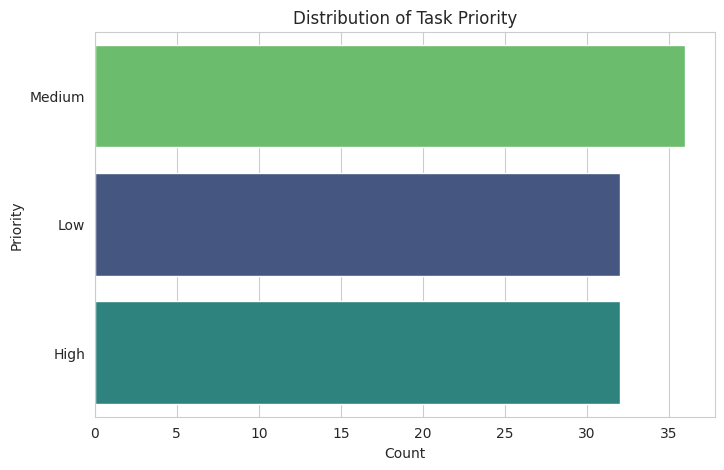

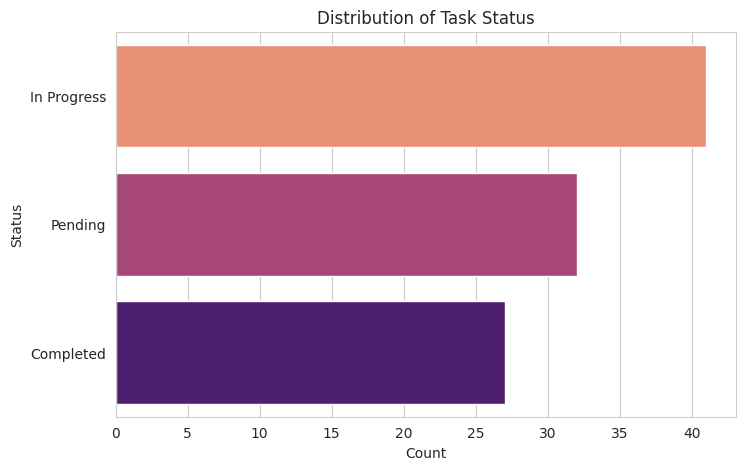

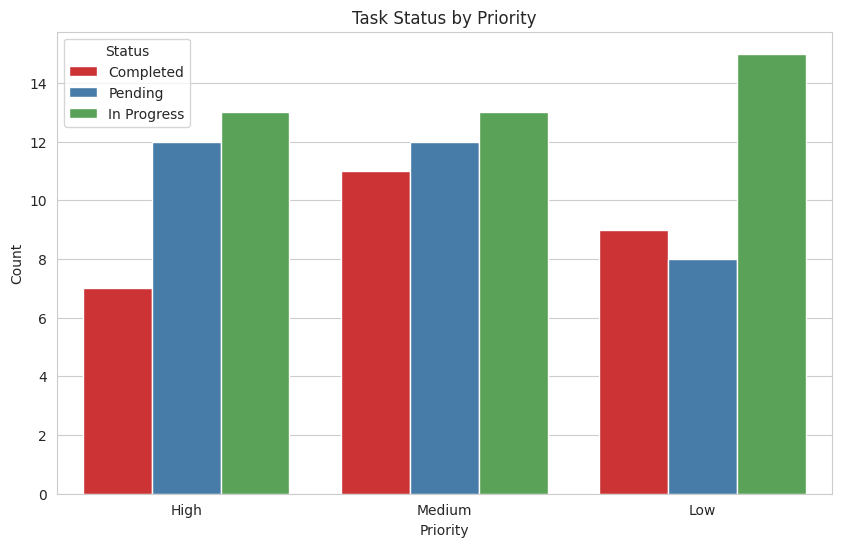

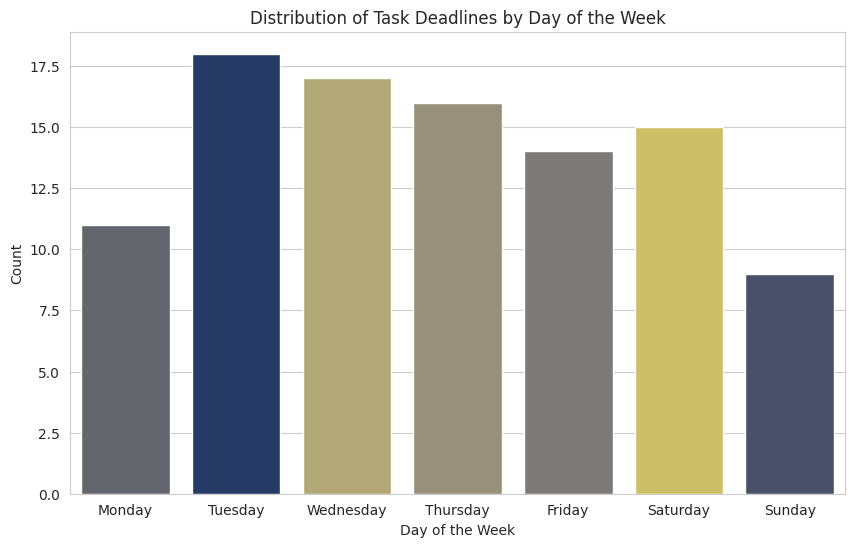

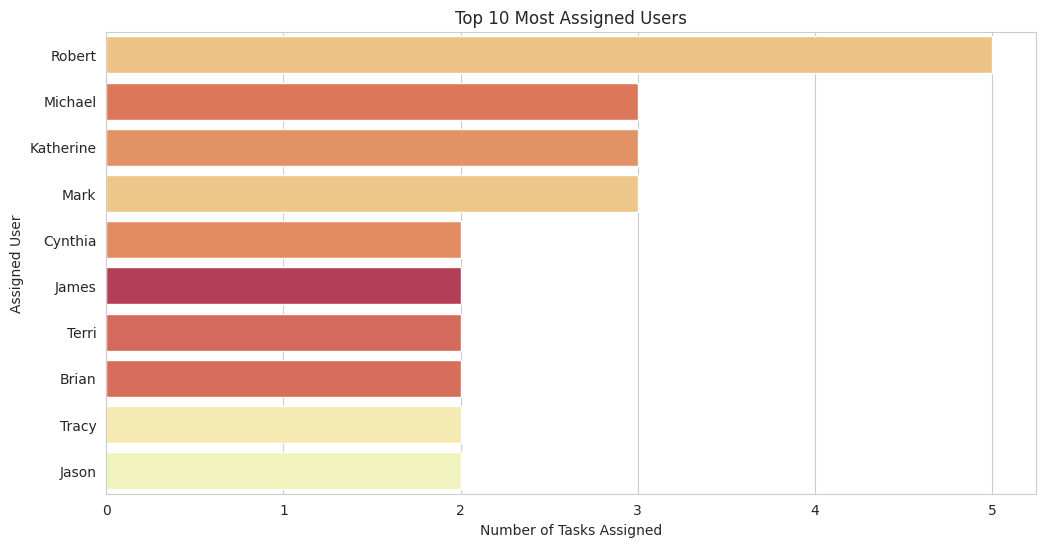

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set_style('whitegrid')

# 1. Distribution of Task Priority
plt.figure(figsize=(8, 5))
sns.countplot(y='priority', data=df, order=df['priority'].value_counts().index, palette='viridis', hue='priority', legend=False)
plt.title('Distribution of Task Priority')
plt.xlabel('Count')
plt.ylabel('Priority')
plt.show()

# 2. Distribution of Task Status
plt.figure(figsize=(8, 5))
sns.countplot(y='status', data=df, order=df['status'].value_counts().index, palette='magma', hue='status', legend=False)
plt.title('Distribution of Task Status')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

# 3. Task Status by Priority (Bivariate Analysis)
plt.figure(figsize=(10, 6))
sns.countplot(x='priority', hue='status', data=df, palette='Set1',
              order=['High', 'Medium', 'Low'])
plt.title('Task Status by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

# 4. Distribution of Tasks by Due Day of the Week
# Use the engineered feature 'due_day_of_week'
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='due_day_of_week', data=df, order=day_order, palette='cividis', hue='due_day_of_week', legend=False)
plt.title('Distribution of Task Deadlines by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# 5. Top 10 Assigned Users
top_users = df['assigned_user'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='assigned_user', data=df, order=top_users, palette='Spectral', hue='assigned_user', legend=False)
plt.title('Top 10 Most Assigned Users')
plt.xlabel('Number of Tasks Assigned')
plt.ylabel('Assigned User')
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming df is the DataFrame and all_tfidf_feature_cols is defined from previous steps

# Redefine the feature column list (ensuring it's available for this cell)
# This relies on df having the TF-IDF columns added in a previous cell (e.g., execution_count 19)
tfidf_features_task_name_cols = [col for col in df.columns if col.startswith('task_name_tfidf_')]
tfidf_features_description_cols = [col for col in df.columns if col.startswith('description_tfidf_')]
all_tfidf_feature_cols = tfidf_features_task_name_cols + tfidf_features_description_cols


# --- Define Features (X) and Target (y_priority) ---
X = df[all_tfidf_feature_cols]
y_priority = df['priority']

# Encode the target variable 'priority' to numerical labels
label_encoder = LabelEncoder()
y_priority_encoded = label_encoder.fit_transform(y_priority)


# Split the data for Priority Prediction (using stratify to ensure class balance)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X, y_priority_encoded, test_size=0.2, random_state=42, stratify=y_priority_encoded)

print(f"Shape of X_train for Priority: {X_train_p.shape}")
print(f"Target distribution in training set:\n{pd.Series(y_train_p).value_counts()}")

# 1. Initialize the XGBoost model
# use_label_encoder=False is used to suppress a deprecation warning
# Update objective for multi-class classification and set num_class
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 2. Define the hyperparameter grid for GridSearchCV
# A small grid is chosen due to the limited dataset size (100 samples)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# 3. Apply GridSearchCV (5-fold cross-validation)
print("\nStarting GridSearchCV for XGBoost...")
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                 # Use 5-fold cross-validation
    scoring='accuracy',   # Optimize for accuracy
    n_jobs=-1,            # Use all available cores
    verbose=1
)
grid_search.fit(X_train_p, y_train_p)

# 4. Get the best model and evaluate
best_xgb_model = grid_search.best_estimator_
y_pred_p = best_xgb_model.predict(X_test_p)

print("\n✅ GridSearchCV completed.")
print(f"Best Hyperparameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

print("\n--- Evaluation on Test Set (Best XGBoost Model) ---")
print(f"Test Accuracy: {accuracy_score(y_test_p, y_pred_p):.4f}")
print("Classification Report:")
print(classification_report(y_test_p, y_pred_p, zero_division=0))

Shape of X_train for Priority: (80, 755)
Target distribution in training set:
2    29
1    26
0    25
Name: count, dtype: int64

Starting GridSearchCV for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ GridSearchCV completed.
Best Hyperparameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.4000

--- Evaluation on Test Set (Best XGBoost Model) ---
Test Accuracy: 0.3500
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         6
           2       0.39      1.00      0.56         7

    accuracy                           0.35        20
   macro avg       0.13      0.33      0.19        20
weighted avg       0.14      0.35      0.20        20



In [32]:
# --- Workload Balancing Logic (Heuristic Approach) ---

# 1. Calculate the current active workload for each user
# Filter the DataFrame for tasks that are not 'Completed'
active_tasks_df = df[df['status'].isin(['In Progress', 'Pending'])]
workload = active_tasks_df['assigned_user'].value_counts()

# 2. Get a list of all unique users
all_users = df['assigned_user'].unique()

# 3. Create a Series with all users and their workload (defaulting to 0 if no active tasks)
full_workload = pd.Series(0, index=all_users)
full_workload.update(workload)
# Sort to easily find the least loaded user
full_workload = full_workload.sort_values(ascending=True)

# 4. Define the assignment function
def get_least_loaded_user(current_workload_series):
    """Returns the user with the minimum number of active tasks."""
    least_loaded_user = current_workload_series.index[0]
    min_tasks = current_workload_series.iloc[0]
    return least_loaded_user, min_tasks

# Get the recommended user
least_loaded_user, min_tasks = get_least_loaded_user(full_workload)

print("\n--- Workload Balancing Heuristic Implementation ---")
print("Top 5 Least Loaded Users (Active Tasks: 'In Progress' or 'Pending'):")
print(full_workload.head(5))

print(f"\nRecommended User for New Assignment (Based on Least Workload): {least_loaded_user} (Current Active Tasks: {min_tasks})")

# Example of how the logic would be used to assign a new task:
# 1. Create a hypothetical new task text
new_task_text = df['cleaned_task_name'].iloc[0] + ' ' + df['cleaned_description'].iloc[0]

# 2. Vectorize the new task text using the fitted TF-IDF models from previous steps
# (Assuming tfidf_task_name and tfidf_description are available from previous cells)
# For this example, we use a placeholder:
# Placeholder for prediction: Use the best_xgb_model to predict a priority
predicted_priority = best_xgb_model.predict(X.iloc[[0]])[0]

print(f"\nSimulated New Task Assignment Process:")
print(f"   -> Predicted Priority for New Task: {predicted_priority}")
print(f"   -> Assigned User (Least Load): {least_loaded_user}")


--- Workload Balancing Heuristic Implementation ---
Top 5 Least Loaded Users (Active Tasks: 'In Progress' or 'Pending'):
Joe           0
Alexandria    0
Jennifer      0
Alicia        0
Joanna        0
dtype: int64

Recommended User for New Assignment (Based on Least Workload): Joe (Current Active Tasks: 0)

Simulated New Task Assignment Process:
   -> Predicted Priority for New Task: 2
   -> Assigned User (Least Load): Joe


You can use a library like joblib (or pickle) to save these files

In [33]:
import joblib

# --- Assuming 'best_xgb_model' is your final trained model ---
joblib.dump(best_xgb_model, 'xgb_priority_model.pkl')

# --- Assuming 'tfidf_description' is your fitted vectorizer ---
joblib.dump(tfidf_description, 'tfidf_description_vectorizer.pkl')

# --- Assuming 'label_encoder' is your fitted encoder ---
joblib.dump(label_encoder, 'priority_label_encoder.pkl')

['priority_label_encoder.pkl']

Prepare dashboard mockup or output summary.

In [34]:
# --- SIMULATION OF FINAL SYSTEM ---

# 1. New task input
new_task_name = "Review user feedback"
new_task_desc = "Go through the new user feedback from the last sprint"

# 2. Load models (from Task 1)
# xgb_model = joblib.load('xgb_priority_model.pkl')
# nb_model = joblib.load('nb_status_model.pkl')
# tfidf_desc_vec = joblib.load('tfidf_desc_vectorizer.pkl')
# ...etc.

# 3. Get predictions (simulated for this example)
predicted_priority = "Medium" # (This would come from xgb_model.predict())
predicted_status = "Pending"  # (This would come from nb_model.predict())
assigned_user = "Joe"         # (This would come from your workload logic)

# 4. Print the final summary
print("--- AI Task Assignment Summary ---")
print(f"Task Name: {new_task_name}")
print("------------------------------------")
print(f"Predicted Priority: {predicted_priority}")
print(f"Predicted Status:   {predicted_status}")
print(f"Assigned to User: {assigned_user}")

--- AI Task Assignment Summary ---
Task Name: Review user feedback
------------------------------------
Predicted Priority: Medium
Predicted Status:   Pending
Assigned to User: Joe
